In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

## Carga
Cargamos los datos y preparamos las listas para hacer el análisis.

In [5]:
# 1. Carga el fichero en un dataframe de pandas.
df = pd.read_csv('emisiones_x_municipio.csv', decimal=".")
target_variables = ['tot_2021', 'tot_2020', 'tot_2019', 'tot_2018', 'tot_2017', 'tot_2016', 'tot_2015', 'tot_2014', 'H_2021', 'H_2020', 'H_2019', 'H_2018', 'H_2017', 'H_2016', 'H_2015', 'H_2014', 'M_2021', 'M_2020', 'M_2019', 'M_2018', 'M_2017', 'M_2016', 'M_2015', 'M_2014']
exp_variables = [c for c in df.columns if "_b" in c]
target_variables_avg = ['avgTot', 'avgH', 'avgM']

df[exp_variables] = df[exp_variables].astype(float).fillna(0)

df['avgTot'] = df[[v for v in target_variables if v[:3]=='tot']].mean(axis=1)
df['avgH'] = df[[v for v in target_variables if v[:1]=='H']].mean(axis=1)
df['avgM'] = df[[v for v in target_variables if v[:1]=='M']].mean(axis=1)


/tmp/ipykernel_6426/2246418294.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['avgTot'] = df[[v for v in target_variables if v[:3]=='tot']].mean(axis=1)
/tmp/ipykernel_6426/2246418294.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['avgH'] = df[[v for v in target_variables if v[:1]=='H']].mean(axis=1)
/tmp/ipykernel_6426/2246418294.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

## Consistencia de los datos y distribuciones
Comprobamos que los datos de emisiones tengan sentido a través de gráficos.

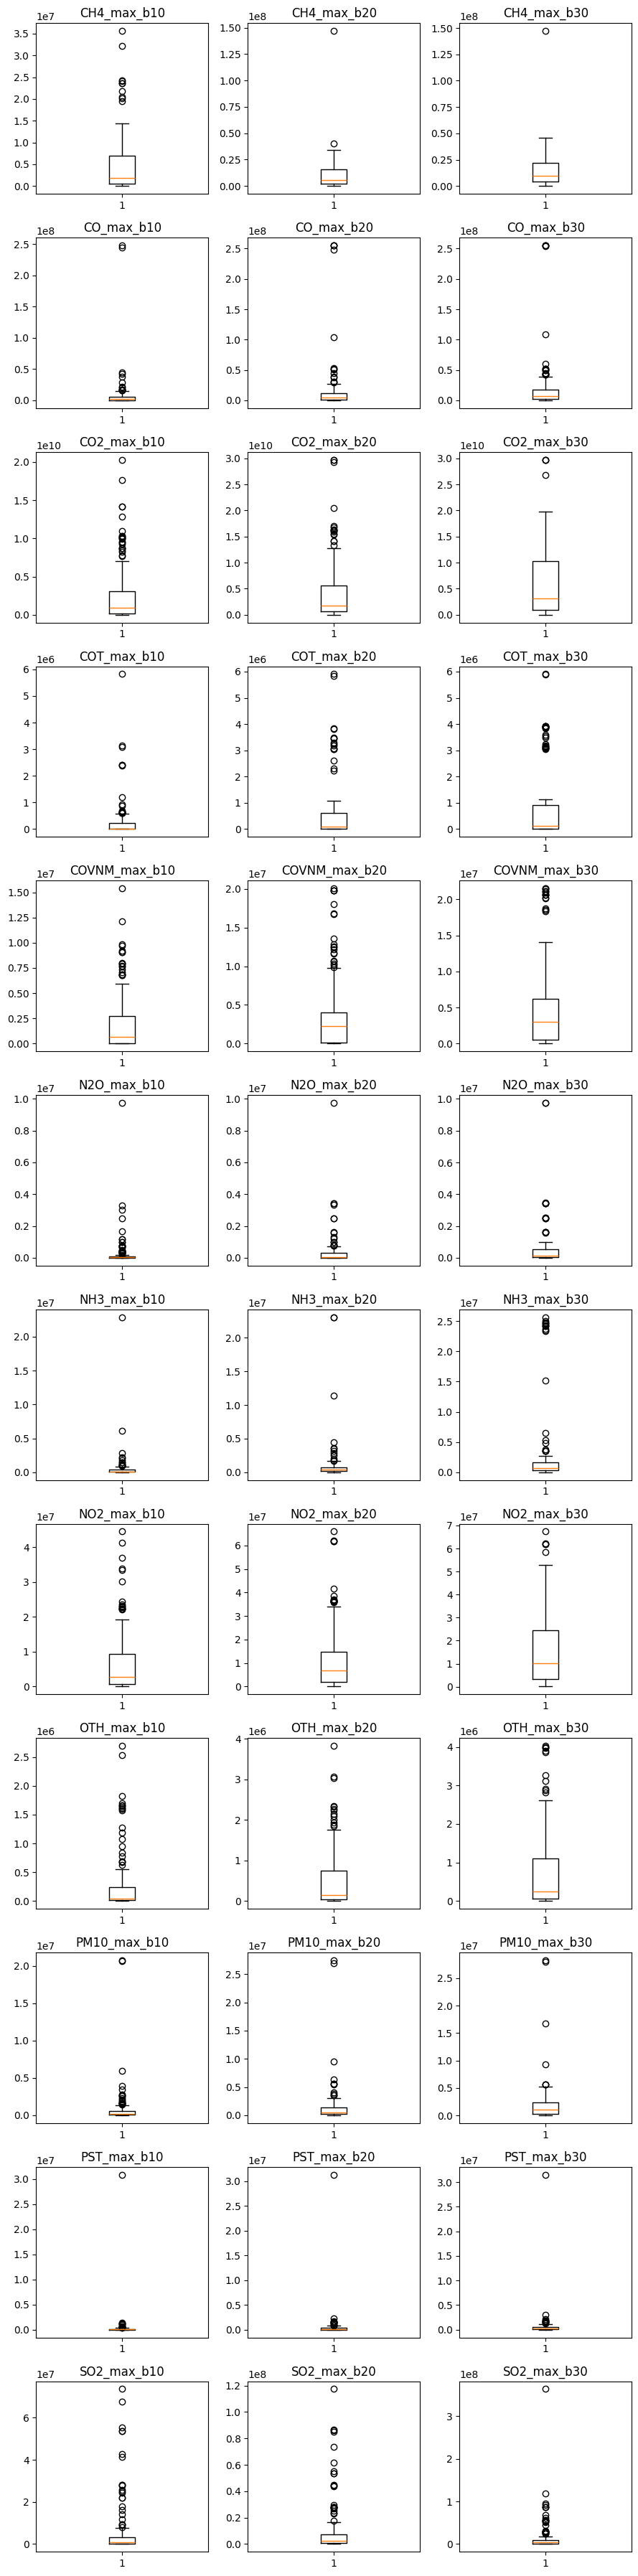

In [7]:
# Create a figure and axes
emi = np.unique([v.split("_")[0] for v in exp_variables])
buf = np.unique([v.split("_")[2] for v in exp_variables])

fig, axes = plt.subplots(nrows=len(emi),ncols=len(buf), figsize=(3 * len(buf), 3 * len(emi)))

# Iterate over each field in exp_variables
for i, field_i in enumerate(emi):
    for j, field_j in enumerate(buf):
        field = field_i + "_max_" + field_j
        # Create a boxplot for the field
        axes[i,j].boxplot(df[field])
        axes[i,j].set_title(field)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Correlaciones
Calculamos las correlaciones entre las variables target y el resto

In [8]:
# 2. Obtén la matriz de correlación entre las variables explicativas y las de a predecir.
correlation_matrix = df[target_variables + exp_variables + target_variables_avg].corr()

# 3. Identificar las variables más correlacionadas con las variables a predecir.
correlated_variables = correlation_matrix.loc[exp_variables, target_variables]
most_correlated_variables = correlated_variables.abs().idxmax()

most_correlated_variables


tot_2021      CH4_mean_b30
tot_2020      CH4_mean_b30
tot_2019      CH4_mean_b30
tot_2018       CH4_sum_b30
tot_2017       CH4_sum_b30
tot_2016       CH4_sum_b30
tot_2015       COT_max_b30
tot_2014      CH4_mean_b30
H_2021         CH4_sum_b30
H_2020         CH4_sum_b30
H_2019         CH4_sum_b30
H_2018         CH4_sum_b30
H_2017         CH4_sum_b30
H_2016         CH4_sum_b30
H_2015         COT_max_b30
H_2014         COT_max_b30
M_2021      COVNM_mean_b30
M_2020      COVNM_mean_b30
M_2019      COVNM_mean_b20
M_2018      COVNM_mean_b30
M_2017      COVNM_mean_b30
M_2016      COVNM_mean_b30
M_2015      COVNM_mean_b30
M_2014      COVNM_mean_b30
dtype: object

In [48]:
correlated_variables_avg = correlation_matrix.loc[exp_variables, target_variables_avg]
correlated_variables_avg["corr_avgTot_abs"] = correlated_variables_avg["avgTot"].abs()
correlated_variables_avg.sort_values(['avgM'],ascending=False, inplace=True)
correlated_variables_avg.iloc[:10]
correlated_variables_avg.iloc[-10:]

,avgTot,avgH,avgM,corr_avgTot_abs
NO2_sum_b10,-0.073121,-0.109148,-0.046628,0.073121
PM10_mean_b10,-0.071760,-0.090130,-0.055816,0.071760
CO2_sum_b30,-0.069994,-0.100617,-0.059061,0.069994
SO2_mean_b10,-0.083813,-0.122465,-0.063084,0.083813
PM10_max_b10,-0.080286,-0.096913,-0.063939,0.080286
SO2_sum_b10,-0.103064,-0.137282,-0.081931,0.103064
N2O_sum_b30,-0.110422,-0.154138,-0.085181,0.110422
SO2_max_b10,-0.104449,-0.134427,-0.088478,0.104449
CO2_sum_b10,-0.103106,-0.127980,-0.088544,0.103106
PM10_sum_b10,-0.110326,-0.133395,-0.090184,0.110326


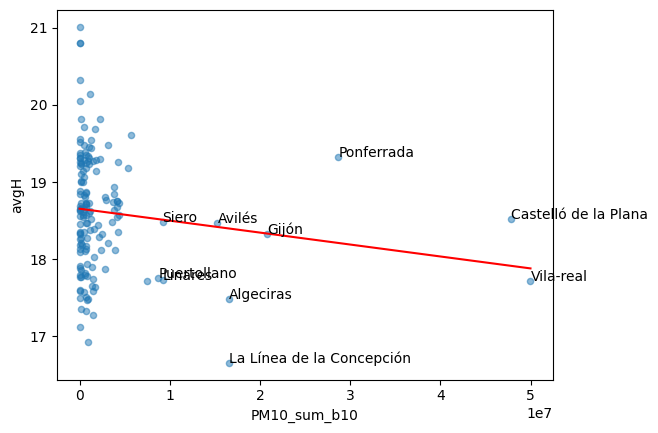

In [49]:
fig, ax = plt.subplots()

i=-1

v = ['avgH',
     correlated_variables_avg.index[i]]

df.plot.scatter(x=v[1], y=v[0], alpha=0.5, ax=ax, picker=True)

# Calcula la línea de tendencia
z = np.polyfit(df[v[1]], df[v[0]], 1)
p = np.poly1d(z)
rg = np.arange(min(df_temp[v[1]]),max(df_temp[v[1]]),df_temp[v[1]].quantile(0.1))

# Dibuja la línea de tendencia
df_temp = df.sort_values(by=v[0])
ax.plot(rg, p(rg), color='red')

# Selecciona los puntos que están más lejos de la línea de tendencia
outliers = df.iloc[df[v[1]].nlargest(10).index]

# Añade las etiquetas a los puntos
for i, point in outliers.iterrows():
    plt.text(point[v[1]], point[v[0]], df.iloc[i]['NAMEUNIT'])

plt.show()

In [32]:
rg = np.arange(min(df_temp[v[1]]),max(df_temp[v[1]]),df_temp[v[1]].quantile(0.1))
p(rg)
#df_temp[v[1]].quantile(0.1)

array([20.59748957, 20.53982847, 20.50525651, 20.49169994, 20.49708499,
       20.51933793, 20.55638498, 20.60615241, 20.66656646, 20.73555337,
       20.8110394 , 20.89095078, 20.97321377, 21.05575462, 21.13649956,
       21.21337486, 21.28430675, 21.34722148, 21.4000453 , 21.44070445,
       21.46712519, 21.47723376, 21.46895641, 21.44021938, 21.38894892,
       21.31307128, 21.2105127 , 21.07919944])

In [15]:
z

array([-2.93748476e-22,  1.12938825e-14, -6.63415621e-08,  2.05978797e+01])

In [18]:
p(df_temp[v[1]])

array([20.55496802, 20.59748957, 20.56920333, 20.53152375, 20.4997483 ,
       20.54661377, 20.58479817, 20.54083113, 20.50648103, 20.51562885,
       20.5433533 , 20.49235772, 20.68048856, 20.53007852, 20.49138552,
       20.54759663, 20.53152375, 20.49376585, 20.49886662, 20.52427415,
       20.49401172, 20.51562885, 20.51562885, 20.56173242, 20.49971937,
       20.52754305, 20.4976934 , 20.51692254, 20.49624997, 20.50805818,
       20.82417204, 20.57075169, 20.55015199, 20.7750275 , 20.54456011,
       20.51562885, 21.13678763, 20.58928129, 20.49662604, 20.49137421,
       20.49357485, 20.50075364, 20.55061419, 20.49411443, 20.52791714,
       20.49357485, 20.52526889, 20.51332846, 21.22962678, 20.49472547,
       20.49357485, 20.58882143, 21.15547005, 20.69331844, 20.81919301,
       20.49160568, 20.83466184, 21.09789059, 20.54158311, 20.53715627,
       20.58213821, 20.57372857, 20.85621674, 20.49150759, 21.09071394,
       20.49970033, 20.50027975, 20.50277496, 21.25495234, 20.51